In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\LENOVO\Downloads\steam_dataset.csv')
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,revenue
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,20000000,7.19,143800000.0
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,10000000,3.99,39900000.0
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,10000000,3.99,39900000.0
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,10000000,3.99,39900000.0
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,10000000,3.99,39900000.0


In [3]:
# Q1 : what platforms are present in the data
# expected answer : ['windows', 'mac', 'linux']


In [4]:
unique_platforms = list(df['platforms'].str.split(';').explode().unique())
unique_platforms

['windows', 'mac', 'linux']

In [5]:
# Q2 CEO:  which platform has most no of games

# Answer : windows has maximum no of titles 

In [6]:
df['platforms'].str.split(';').explode().value_counts()

platforms
windows    27070
mac         8066
linux       5235
Name: count, dtype: int64

In [7]:
# Q3 CEO:  which category has most no of games


In [8]:
df['categories'].str.split(';').explode().value_counts().idxmax()

'Single-player'

In [138]:
# Q4  Which Category of games has the highest average play time.

df['categories_split'] = df['categories'].str.split(';')

df_exploded = df.explode('categories_split')
df_exploded.groupby('categories_split')['average_playtime'].mean().idxmax()

'Valve Anti-Cheat enabled'

In [10]:
# Q5 how does age influence average play time?
# which age has the highest
# find out sum, average, min, max for average playtimes for different age groups


In [11]:
df.groupby(['required_age'])['average_playtime'].agg(['min','max','mean','sum'])

,min,max,mean,sum
required_age,,,,
0,0,190625,140.742135,3726711
3,0,1350,169.181818,1861
7,0,244,60.500000,726
12,0,2622,226.301370,16520
16,0,28897,664.833333,127648
18,0,10659,592.542208,182503


In [144]:
# Q6 Find out the most frequent platform among the top 5 profitable games.

In [142]:
top_5_profitable_games = df.nlargest(5, 'revenue')
top_5_profitable_games['platforms_split'] = top_5_profitable_games['platforms'].str.split(';')
platforms_exploded = top_5_profitable_games.explode('platforms_split')
platforms_exploded['platforms_split'].value_counts().idxmax()

'windows'

In [145]:
# Q7 what is the optimal age restriction to make highest profit profitable game ?


In [15]:
df.groupby(['required_age'])['revenue'].agg(['min','max','mean','sum'])

,min,max,mean,sum
required_age,,,,
0,0.0,2.699000e+09,1.286914e+06,3.407620e+10
3,33800.0,6.990000e+06,7.608818e+05,8.369700e+06
7,0.0,2.999000e+06,5.438833e+05,6.526600e+06
12,0.0,7.495000e+07,3.084153e+06,2.251432e+08
16,0.0,1.998000e+08,8.568779e+06,1.645206e+09
18,0.0,4.998000e+08,2.254124e+07,6.942701e+09


In [ ]:
# Q8 

# ChatGPT qns 
# Beginner-Level (Basic Understanding):

In [12]:
# 1. How many games are in the dataset?
len(df)

27075

In [13]:
# 2. What are the names of the first 5 games in the dataset?
df['name'].head()

0               Counter-Strike
1        Team Fortress Classic
2                Day of Defeat
3           Deathmatch Classic
4    Half-Life: Opposing Force
Name: name, dtype: object

In [15]:
# 3. How many games are in English?
len(df[df['english']==1])

26564

In [16]:
# 4. What is the average price of the games in the dataset?
df['price'].mean()

6.078193167128348

In [21]:
# 5. Which game has the highest number of positive ratings?
df.iloc[df['positive_ratings'].idxmax()]

appid                                                             730
name                                 Counter-Strike: Global Offensive
release_date                                               2012-08-21
english                                                             1
developer                             Valve;Hidden Path Entertainment
publisher                                                       Valve
platforms                                           windows;mac;linux
required_age                                                        0
categories          Multi-player;Steam Achievements;Full controlle...
genres                                            Action;Free to Play
steamspy_tags                                 FPS;Multiplayer;Shooter
achievements                                                      167
positive_ratings                                              2644404
negative_ratings                                               402313
average_playtime    

In [24]:
# 6. How many unique developers are listed in the dataset?
df['developer'].nunique()

17112

In [28]:
# 7. What is the most common platform for the games in this dataset?
df['platforms'].str.split(';').explode().value_counts().idxmax()

'windows'

In [32]:
# 8. How many games have a required age of 18 or higher?
len(df[df['required_age']==18])

308

In [33]:
# 9. What is the total revenue generated by all games in the dataset?
df['revenue'].sum()

42904149200.0

In [195]:
# 10. How many games have more than 50 achievements?

In [35]:
len(df[df['achievements']>50])

2125

# Intermediate-Level (Deeper Insights):

In [36]:


# 1. What is the correlation between the price of a game and its positive ratings?
df['price'].corr(df['positive_ratings'])

0.03610957799343523

In [41]:
# 2. How many games are published by the publisher "Indie Voyage"?
len(df[df['publisher']=="Indie Voyage"])


3

In [44]:
# 3. What is the median playtime for games that have over 100 positive ratings?
new_df = df[df['positive_ratings']>100]
new_df['median_playtime'].median()

56.0

In [48]:
# 4. What percentage of games have at least 1 Steam achievement?
(len(df[df['achievements']>0])/len(df))*100

56.18097876269621

In [50]:
# 5. How many games are classified under the "Action" genre?
len(df[df['genres']=='Action'])

843

In [52]:
# 6. What is the average number of negative ratings for games with over 10,000 owners?
new_df=df[df['owners']>10000]
new_df['negative_ratings'].mean()

211.02714681440443

In [55]:
# 7. Which developer has the most games listed in the dataset?
df['developer'].value_counts().idxmax()

'Choice of Games'

In [57]:
# 8. What is the average playtime for games with more than 500 positive ratings?
new_df=df[df['positive_ratings']>500]
new_df['average_playtime'].mean()

817.0091855480711

In [63]:
# 9. How many games are tagged as "Early Access" in their steamspy_tags?
len(df[df['steamspy_tags'].str.contains('Early Access')])

2967

In [66]:
# 10. What is the total revenue generated by games that have "RPG" in their genre?
new_df=df[df['genres']=='RPG']
new_df['revenue'].sum()

1829827500.0

# Advanced-Level (Complex Analysis):

In [67]:
# 1. What is the relationship between a game's price and its revenue? Is there a positive or negative correlation?
df['price'].corr(df['revenue'])

0.14788822771568716

Weak positive correlation between price and revenue

In [68]:
# 2. What is the average number of positive ratings for games released before 2015 compared to those released after 2015?
df['release_date'] = pd.to_datetime(df['release_date'])

before_2015 = df[df['release_date'].dt.year < 2015]
after_2015 = df[df['release_date'].dt.year >= 2015]

before_ratings = before_2015['positive_ratings'].mean()
after_ratings = after_2015['positive_ratings'].mean()

print("Before 2015 Average positive ratings :", before_ratings)
print("After 2015 Average positive ratings :", after_ratings)

Before 2015 Average positive ratings : 4117.850014762326
After 2015 Average positive ratings : 554.8363728470111


In [77]:
# 3. Find the top 5 genres that generate the highest average revenue.

df['genres_split']=df['genres'].str.split(';')#.explode()
df_exploaded = df.explode('genres_split')

df_exploaded.groupby(['genres_split'])['revenue'].mean().sort_values(ascending=False).head()

genres_split
Massively Multiplayer    5.821937e+06
Web Publishing           4.586529e+06
Action                   2.270695e+06
Design & Illustration    2.166987e+06
RPG                      2.145811e+06
Name: revenue, dtype: float64

In [79]:
# 4. What is the average price for games with more than 50 achievements and more than 100 positive ratings?
new_df = df[(df['achievements']>50) & (df['positive_ratings']>100)]
new_df['price'].mean()

11.884162724692526

In [84]:
# 5. How many games are available on multiple platforms (e.g., Windows and another platform)?
df['num_platforms']=df['platforms'].str.split(';').apply(len)
len(df[df['num_platforms']>1])

8673

In [89]:
# 6. Which genre has the highest number of games with over 1,000 positive ratings?
new_df=df_exploded[df_exploded['positive_ratings']>1000]
new_df.groupby('genres_split').size().idxmax()

'Indie'

In [90]:
# 7. For games with a price higher than $20, what is the median playtime compared to games priced under $20?
under_20 = df[df['price']<20]
above_20 = df[df['price']>=20]

med_play_under_20 = under_20['median_playtime'].median()
med_play_above_20 = above_20['median_playtime'].median()

print('Median PLaytime for game under 20$ :',med_play_under_20)
print('Median PLaytime for game above 20$ :',med_play_above_20)


Median PLaytime for game under 20$ : 0.0
Median PLaytime for game above 20$ : 0.0


In [ ]:
# 8. Build a model to predict the number of positive ratings based on features like price, release date, and genre.


In [98]:
# Convert 'release_date' to datetime
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month

# Split genres
df['genres'] = df['genres'].str.split(';')
df_exploded = df.explode('genres')


In [100]:
# Features and target variable
X = df_exploded[['price', 'release_year', 'release_month', 'genres']]
y = df_exploded['positive_ratings']


In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [113]:
X_train_num=X_train.select_dtypes(exclude=['object'])
X_train_cat=X_train.select_dtypes(include=['object'])

In [114]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
X_train_num_transformed=pd.DataFrame(std_scaler.fit_transform(X_train_num),
                                    columns=std_scaler.get_feature_names_out(),
                                    index=X_train_num.index)



In [116]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder(handle_unknown="use_encoded_value",
                              unknown_value=-1,
                              encoded_missing_value=-5)
X_train_cat_transformed=pd.DataFrame(ordinal_encoder.fit_transform(X_train_cat),
                                    columns=ordinal_encoder.get_feature_names_out(),
                                    index=X_train_cat.index)
X_train_cat_transformed.head()

,genres
9208,2.0
2422,21.0
6884,10.0
14246,2.0
5688,22.0


In [117]:
X_train_transformed = pd.concat([X_train_num_transformed,X_train_cat_transformed],axis=1)
X_train_transformed.head()

,price,release_year,release_month,genres
9208,-0.645648,-0.391732,-0.441366,2.0
2422,0.714893,-1.466853,-1.306288,21.0
6884,-0.747046,-0.929293,1.000171,10.0
14246,0.150140,0.145828,-0.729673,2.0
5688,-0.747046,0.145828,0.711863,22.0


In [118]:
X_test_num=X_test.select_dtypes(exclude=['object'])
X_test_cat=X_test.select_dtypes(include=['object'])


In [119]:
# Numerical data ttransformation
X_test_num_transformed=pd.DataFrame(std_scaler.transform(X_test_num),
                                   columns=std_scaler.get_feature_names_out(),
                                   index=X_test_num.index)

X_test_cat_transformed = pd.DataFrame(ordinal_encoder.transform(X_test_cat),
                                      columns=ordinal_encoder.get_feature_names_out(),
                                     index=X_test_cat.index)

X_test_transformed = pd.concat([X_test_num_transformed,X_test_cat_transformed],axis=1)
X_test_transformed.head()

,price,release_year,release_month,genres
7164,-0.234918,-0.929293,1.288478,2.0
1418,0.150140,-2.541974,0.711863,17.0
25933,-0.645648,0.683389,1.576786,13.0
25616,-0.747046,1.220950,-0.729673,13.0
22926,-0.645648,0.683389,0.135249,13.0


In [120]:
%%time
from sklearn.linear_model import LinearRegression
from sklearn import metrics

linear_regressor = LinearRegression()
linear_regressor.fit(X_train_transformed,y_train)

y_test_predicted=linear_regressor.predict(X_test_transformed)
error=metrics.mean_absolute_error(y_test, y_test_predicted)
print("Mean Absolute Error:", error)


Mean Absolute Error: 1742.2900301780185
CPU times: total: 406 ms
Wall time: 1.96 s


In [121]:
%%time
from sklearn.neighbors import KNeighborsRegressor

knn_regressor=KNeighborsRegressor()
knn_regressor.fit(X_train_transformed,y_train)

y_test_predicted = knn_regressor.predict(X_test_transformed)
error = metrics.mean_absolute_error(y_test, y_test_predicted)
print("Mean Absolute Error:",error)


Mean Absolute Error: 1536.8396233817182
CPU times: total: 328 ms
Wall time: 745 ms


In [122]:
%%time
from sklearn.tree import DecisionTreeRegressor

dt_regressor=DecisionTreeRegressor()
dt_regressor.fit(X_train_transformed,y_train)

y_test_predicted = dt_regressor.predict(X_test_transformed)
error = metrics.mean_absolute_error(y_test, y_test_predicted)
print("Mean Absolute Error:",error)


Mean Absolute Error: 1440.616900959128
CPU times: total: 188 ms
Wall time: 305 ms


In [123]:
%%time
from sklearn.ensemble import RandomForestRegressor

rf_regressor=RandomForestRegressor()
rf_regressor.fit(X_train_transformed,y_train)

y_test_predicted = rf_regressor.predict(X_test_transformed)
error = metrics.mean_absolute_error(y_test, y_test_predicted)
print("Mean Absolute Error:",error)


Mean Absolute Error: 1437.2065027112733
CPU times: total: 26 s
Wall time: 26.5 s


In [99]:
# 9. Identify games that have a high number of negative ratings relative to positive ratings. What are the common characteristics of these games?
df['negative_to_positive_ratio'] = df['negative_ratings'] / (df['positive_ratings'] + 1)
median_ratio = df['negative_to_positive_ratio'].median()
high_ratio_games = df[df['negative_to_positive_ratio'] > median_ratio]

# Basic statistics
print(high_ratio_games[['price', 'release_year']].describe())

# Most common genres
print(high_ratio_games['genres'].str.split(';').explode().value_counts())

# Most common platforms
print(high_ratio_games['platforms'].str.split(';').explode().value_counts())


              price  release_year
count  13536.000000  13536.000000
mean       5.563090   2016.441268
std        7.167276      2.034815
min        0.000000   2003.000000
25%        1.590000   2016.000000
50%        3.990000   2017.000000
75%        6.990000   2018.000000
max      154.990000   2019.000000
Series([], Name: count, dtype: int64)
platforms
windows    13534
mac         3348
linux       2065
Name: count, dtype: int64


In [ ]:
# 10. What is the most significant factor affecting a game's revenue based on the dataset? Perform a regression analysis to determine this.


In [125]:
# Features and target variable
X = df_exploded[['price', 'release_year', 'release_month', 'genres']]
y = df_exploded['revenue']

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [127]:
X_train_num=X_train.select_dtypes(exclude=['object'])
X_train_cat=X_train.select_dtypes(include=['object'])

In [128]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
X_train_num_transformed=pd.DataFrame(std_scaler.fit_transform(X_train_num),
                                    columns=std_scaler.get_feature_names_out(),
                                    index=X_train_num.index)



In [129]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder(handle_unknown="use_encoded_value",
                              unknown_value=-1,
                              encoded_missing_value=-5)
X_train_cat_transformed=pd.DataFrame(ordinal_encoder.fit_transform(X_train_cat),
                                    columns=ordinal_encoder.get_feature_names_out(),
                                    index=X_train_cat.index)
X_train_cat_transformed.head()

,genres
9208,2.0
2422,21.0
6884,10.0
14246,2.0
5688,22.0


In [130]:
X_train_transformed = pd.concat([X_train_num_transformed,X_train_cat_transformed],axis=1)
X_train_transformed.head()

,price,release_year,release_month,genres
9208,-0.645648,-0.391732,-0.441366,2.0
2422,0.714893,-1.466853,-1.306288,21.0
6884,-0.747046,-0.929293,1.000171,10.0
14246,0.150140,0.145828,-0.729673,2.0
5688,-0.747046,0.145828,0.711863,22.0


In [131]:
X_test_num=X_test.select_dtypes(exclude=['object'])
X_test_cat=X_test.select_dtypes(include=['object'])


In [132]:
# Numerical data ttransformation
X_test_num_transformed=pd.DataFrame(std_scaler.transform(X_test_num),
                                   columns=std_scaler.get_feature_names_out(),
                                   index=X_test_num.index)

X_test_cat_transformed = pd.DataFrame(ordinal_encoder.transform(X_test_cat),
                                      columns=ordinal_encoder.get_feature_names_out(),
                                     index=X_test_cat.index)

X_test_transformed = pd.concat([X_test_num_transformed,X_test_cat_transformed],axis=1)
X_test_transformed.head()

,price,release_year,release_month,genres
7164,-0.234918,-0.929293,1.288478,2.0
1418,0.150140,-2.541974,0.711863,17.0
25933,-0.645648,0.683389,1.576786,13.0
25616,-0.747046,1.220950,-0.729673,13.0
22926,-0.645648,0.683389,0.135249,13.0


In [133]:
%%time
from sklearn.linear_model import LinearRegression
from sklearn import metrics

linear_regressor = LinearRegression()
linear_regressor.fit(X_train_transformed,y_train)

y_test_predicted=linear_regressor.predict(X_test_transformed)
error=metrics.mean_absolute_error(y_test, y_test_predicted)
print("Mean Absolute Error:", error)


Mean Absolute Error: 2054129.5510670585
CPU times: total: 31.2 ms
Wall time: 19.9 ms


In [134]:
%%time
from sklearn.tree import DecisionTreeRegressor

dt_regressor=DecisionTreeRegressor()
dt_regressor.fit(X_train_transformed,y_train)

y_test_predicted = dt_regressor.predict(X_test_transformed)
error = metrics.mean_absolute_error(y_test, y_test_predicted)
print("Mean Absolute Error:",error)


Mean Absolute Error: 1142007.1494947788
CPU times: total: 172 ms
Wall time: 203 ms


<Axes: >

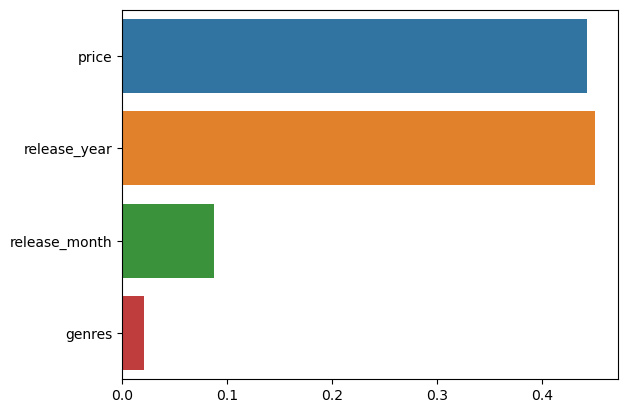

In [135]:
import seaborn as sns
sns.barplot(x=dt_regressor.feature_importances_, y=X_train.columns)